### 1.1 Cum funcționează KNN?

KNN este un algoritm de învățare supervizată bazat pe principiul că obiecte similare tind să fie
apropiate unul de celălalt în spațiul caracteristicilor. Procesul de clasificare urmează pașii:

1. Pentru un punct nou de clasificat:
   - Se calculează distanța față de toate punctele din setul de antrenare
   - Se selectează K cei mai apropiați vecini
   - Se atribuie clasa majoritară dintre acești vecini

### 1.2 Tipuri de Distanțe

În KNN, modul în care măsurăm "apropierea" este crucial. Cele mai comune tipuri de distanțe sunt:

1. Distanța Euclidiană:
   - Formula: d = √(Σ(xi - yi)²)
   - Cea mai comună și intuitivă
   - Bună pentru spații continue

2. Distanța Manhattan:
   - Formula: d = Σ|xi - yi|
   - Utilă în spații discrete sau grid-uri
   - Cunoscută și ca distanța "city block"

3. Distanța Minkowski:
   - O generalizare a distanțelor Euclidiană și Manhattan
   - Formula: d = (Σ|xi - yi|^p)^(1/p)
   - p=2 pentru Euclidiană, p=1 pentru Manhattan

4. Similaritatea Cosinus:
   - Măsoară unghiul dintre vectori
   - Utilă pentru date de înaltă dimensionalitate

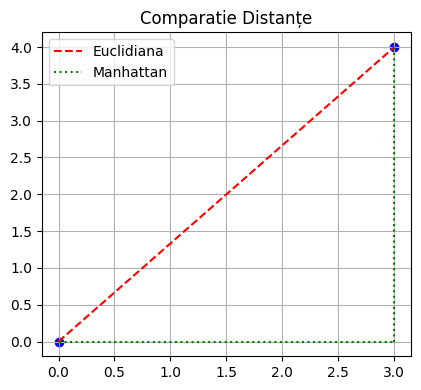

In [ ]:
def plot_distances():
    # Cream puncte pentru exemplu
    point1 = np.array([0, 0])
    point2 = np.array([3, 4])

    # Plotam punctele
    plt.figure(figsize=(12, 4))

    # Distanța Euclidiana
    plt.subplot(131)
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r--', label='Euclidiana')
    plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 'g:', label='Manhattan')
    plt.plot([point2[0], point2[0]], [point1[1], point2[1]], 'g:')
    plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], c='blue')
    plt.title('Comparatie Distanțe')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Vizualizam distantele
plot_distances()

### 1.3 Diagrame Voronoi

Diagramele Voronoi sunt un concept fundamental pentru înțelegerea KNN.
Acestea împart spațiul în regiuni în funcție de proximitatea față de punctele de antrenare.

<Figure size 1000x600 with 0 Axes>

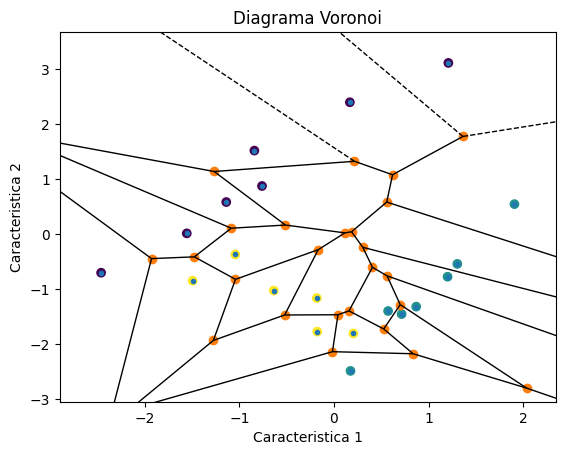

In [ ]:
# Cream o functie pentru a vizualiza diagrama Voronoi pentru un set simplu de date
def plot_voronoi():
    # Generam date simple
    X, y = make_classification(n_samples=20, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)

    # Cream diagrama Voronoi
    vor = Voronoi(X)

    # Plotam rezultatul
    plt.figure(figsize=(10, 6))
    voronoi_plot_2d(vor)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Diagrama Voronoi')
    plt.xlabel('Caracteristica 1')
    plt.ylabel('Caracteristica 2')
    plt.show()

# Vizualizam diagrama Voronoi
plot_voronoi()

## 2. Încărcarea și Pregătirea Datelor

Vom folosi setul de date Iris, care conține măsurători pentru trei specii diferite de flori Iris.
Acest set de date este perfect pentru începători deoarece este simplu și ușor de înțeles.

In [ ]:
#Importarea librariilor necesare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
# Incarcam setul de date Iris
iris = load_iris()
X = iris.data
y = iris.target

# Cream un DataFrame pentru o vizualizare mai buna a datelor
df = pd.DataFrame(X, columns=iris.feature_names)
df['specie'] = pd.Categorical.from_codes(y, iris.target_names)

## 3. Vizualizarea Datelor

Să înțelegem mai întâi datele noastre prin câteva vizualizări simple.

Primele 5 randuri din setul nostru de date:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   specie  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


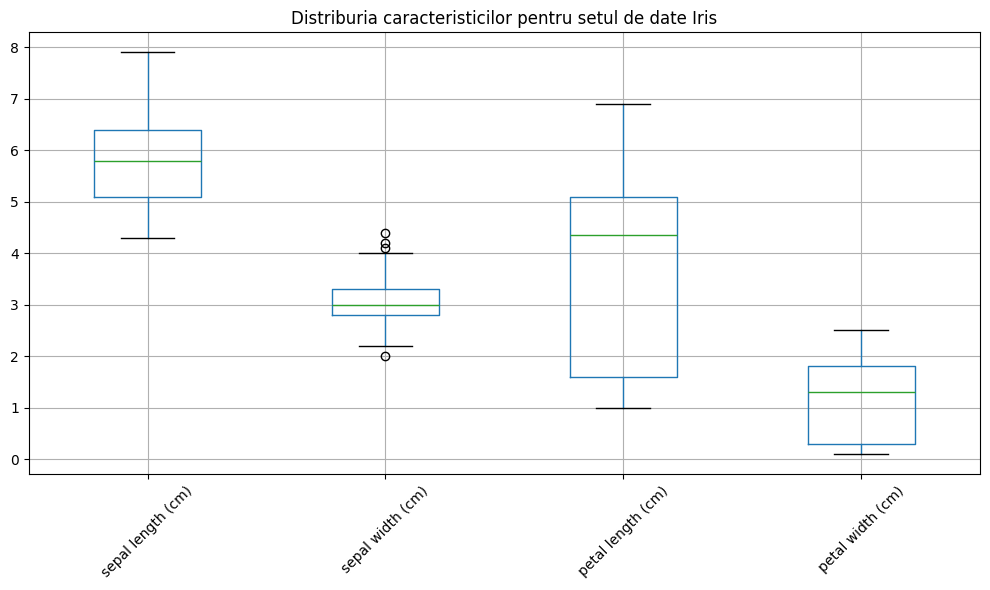

In [ ]:
print("Primele 5 randuri din setul nostru de date:")
print(df.head())

# Cream o vizualizare a distributiei caracteristicilor
plt.figure(figsize=(10, 6))
df.boxplot(column=iris.feature_names)
plt.title('Distriburia caracteristicilor pentru setul de date Iris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Împărțirea Datelor

Împărțim datele în set de antrenare și set de testare.
Setul de antrenare va fi folosit pentru a antrena modelul, iar setul de testare
pentru a evalua performanța modelului pe date noi, nevăzute.

In [ ]:
# Impartim datele in set de antrenare și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiune set de antrenare: {X_train.shape}")
print(f"Dimensiune set de testare: {X_test.shape}")

Dimensiune set de antrenare: (120, 4)
Dimensiune set de testare: (30, 4)


## 5. Antrenarea Modelului KNN

Acum vom crea și antrena modelul nostru KNN.
Vom începe cu K=3 (vom lua în considerare cei mai apropiați 3 vecini).

In [ ]:
# Cream și antrenam modelul
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 6. Evaluarea Modelului

Vom face predicții pe setul de validare și vom evalua performanța modelului

In [ ]:
# Facem predictii
y_pred = knn.predict(X_test)

# Calculam acuratetea
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcuratete: {accuracy:.2f}")

# Afisam raportul detaliat de clasificare
print("\nRaport de clasificare:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Acuratete: 1.00

Raport de clasificare:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 7. Experimentarea cu Diferite Valori ale K

Să vedem cum se schimbă performanța modelului în funcție de diferite valori ale K.

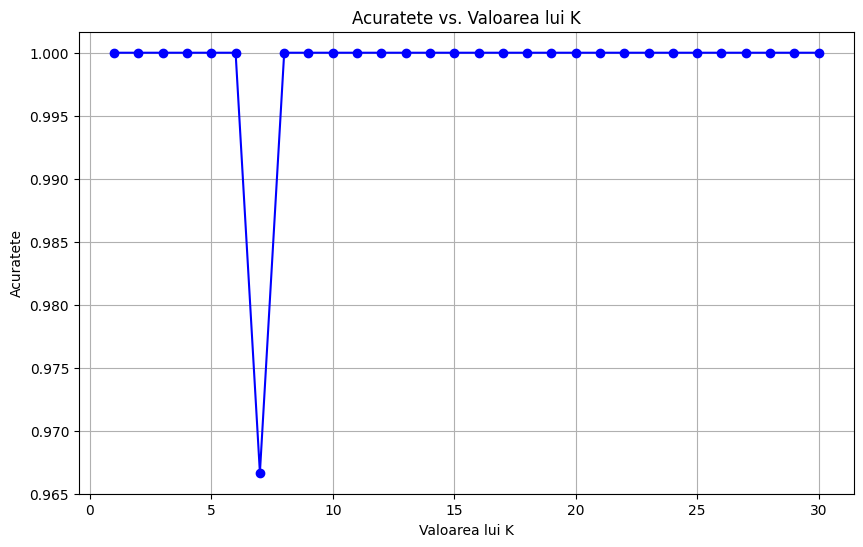

In [ ]:
# Testam diferite valori pentru K
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Vizualizam rezultatele
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('Valoarea lui K')
plt.ylabel('Acuratete')
plt.title('Acuratete vs. Valoarea lui K')
plt.grid(True)
plt.show()

## 8. Functie pentru Predictii Noi

Cream o functie care ne permite sa facem predictii pentru noi masuratori.

In [ ]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width, k=3):
    # Cream și antrenam modelul
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Facem predictia
    prediction = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])

    return iris.target_names[prediction[0]]

# Exemplu de utilizare
print("\nExemplu de predictie:")
print(predict_iris(5.1, 3.5, 1.4, 0.2))


Exemplu de predictie:
setosa


## 9. Concluzii si Sfaturi Practice

1. KNN este un algoritm simplu dar puternic pentru clasificare
2. Alegerea lui K este importanta:
   - K prea mic poate duce la overfitting
   - K prea mare poate duce la underfitting
3. Datele trebuie sa fie normalizate pentru rezultate optime
4. KNN poate fi lent pentru seturi mari de date

Exercitii sugerate:
1. Incercati diferite valori pentru K și observati efectele
2. Testati modelul cu propriile masuratori
3. Incercati sa normalizati datele inainte de antrenare

In [ ]:
#codul tau aici: